In [ ]:
!pip install scikit-learn numpy matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [3]:
#iris=sns.load_dataset('iris')
iris=load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X=iris.data
Y=iris.target
print(f"We have {len(X)} flowers with {X.shape[1]} measurements each")
print(f"Species: {iris.target_names}")



We have 150 flowers with 4 measurements each
Species: ['setosa' 'versicolor' 'virginica']


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 105
Test set size: 45


In [6]:
model=LogisticRegression(max_iter=200)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [8]:
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")

Predictions: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


In [9]:
accuracy = accuracy_score(Y_test, predictions)
print(f"\n🎯 Accuracy: {accuracy * 100:.2f}%")



🎯 Accuracy: 97.78%


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



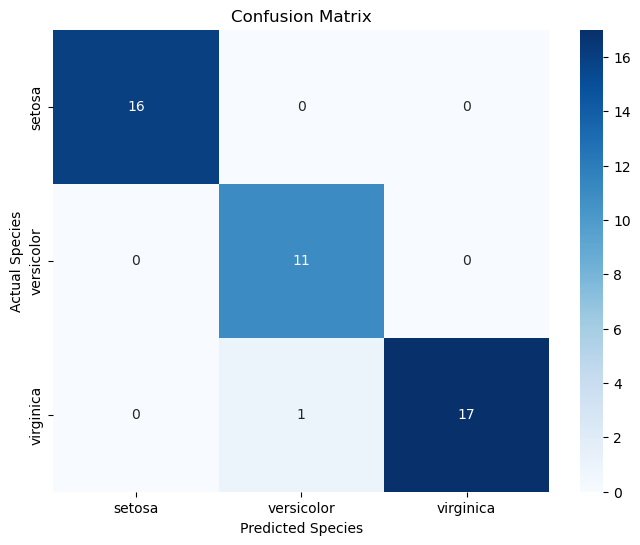

In [13]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.savefig('confusion_matrix.png')
plt.show()

In [14]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # Measurements of a new flower
prediction = model.predict(new_flower)
predicted_species = iris.target_names[prediction[0]]
probability = model.predict_proba(new_flower)[0]

print(f"\n🌸 New Flower Prediction:")
print(f"Measurements: {new_flower[0]}")
print(f"Predicted Species: {predicted_species}")
print(f"Confidence: {max(probability)*100:.2f}%")
print(f"\nProbabilities for each species:")
for name, prob in zip(iris.target_names, probability):
    print(f"  {name}: {prob*100:.2f}%")



🌸 New Flower Prediction:
Measurements: [5.1, 3.5, 1.4, 0.2]
Predicted Species: setosa
Confidence: 97.46%

Probabilities for each species:
  setosa: 97.46%
  versicolor: 2.54%
  virginica: 0.00%


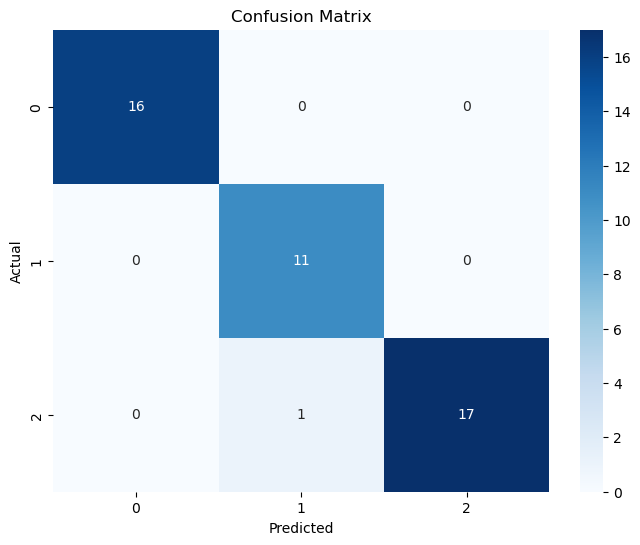

In [13]:
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [14]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

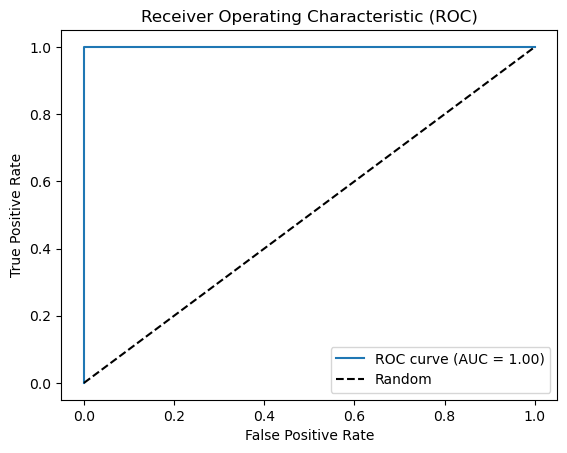

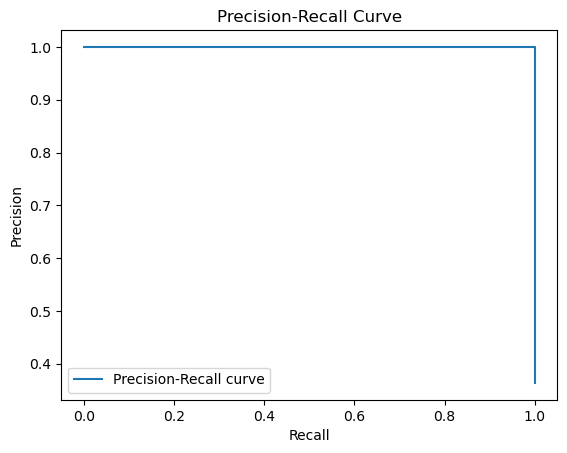

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1246, in fit
    raise 

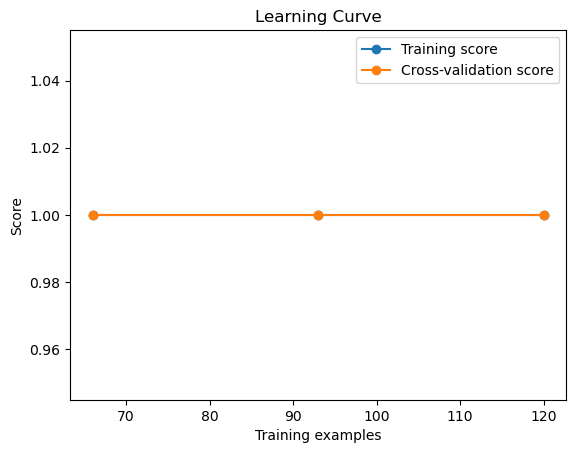

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Load the dataset
iris = load_iris()
X = iris.data
Y = (iris.target == 0).astype(int)  # Binary classification: setosa (1) vs not (0)

# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.22, random_state=42
)

# Train logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# Predict probabilities & classes
probs = model.predict_proba(X_test)[:, 1]  # Probabilities for setosa
Y_pred = model.predict(X_test)

# 1. ROC Curve
fpr, tpr, _ = roc_curve(Y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, probs)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()
